# Maximal Clique Problem
## Report of implementations
**Student:** Matheus Silva Melo de Oliveira

**Institution:** Insper Instituto de Ensino e Pesquisa

<div align="center">
<img width="400px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/VR_complex.svg/1200px-VR_complex.svg.png"/>
</div>

## Motivation
The concept of a clique in a graph is relatively simple. At the most general level, a clique is a subset of a network in which the actors are more closely connected to each other than to other members of the network. In terms of friendship ties, for example, it is not uncommon to find human groups that form cliques based on age, gender, race, ethnicity, religion, ideology, and many other factors. A clique is, therefore, a set of vertices in a graph where every pair of vertices is directly connected by an edge.

Finding the maximum clique in a graph is a computationally challenging task due to the combinatorial nature of the problem. The computational difficulty arises from the need to explore all possible combinations of vertices to identify the largest clique, which becomes exponential in relation to the number of vertices. This results in high computational complexity, even for moderately large graphs.

Cliques are important because, in addition to developing homogeneous behaviors among their members, they have, by definition, great proximity, increasing the speed of exchanges. Thus, information directed at a clique is quickly absorbed by its members, who tend to perceive it similarly. This is important, for example, in segmentation strategies.

Therefore, the efficient resolution of the maximum clique problem has valuable applications in areas ranging from computer science to data analysis in social networks.



**It's expected to run  this notebook in Google Colab, to run in a local machine (Linux ou WSL), run *run.sh* file**

## Setup

In [ ]:
%cd "../.."
!rm -rf Maximal-Clique-Problem

/


In [ ]:
!git clone https://github.com/matheus-1618/Maximal-Clique-Problem

Cloning into 'Maximal-Clique-Problem'...
remote: Enumerating objects: 286, done.
remote: Counting objects: 100% (286/286), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 286 (delta 160), reused 167 (delta 73), pack-reused 0
Receiving objects: 100% (286/286), 3.26 MiB | 11.75 MiB/s, done.
Resolving deltas: 100% (160/160), done.


In [ ]:
%cd "Maximal-Clique-Problem/src"

/Maximal-Clique-Problem/src


## Generating the graph
Using the python lib *networkx*, we create a graph that it's going to be used in the implementations trough this report.

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt
import random
import sys

def generate_graph(vertex: int, plot: bool):
    # Parameters
    num_vertices = vertex  # Number of vertices in the graph
    probability_connection = 0.7  # Probability of having an edge between two vertices (adjust as needed)

    # Create a densely connected random graph
    graph = nx.fast_gnp_random_graph(num_vertices, probability_connection)

    # Output file name
    file_name = "implementations/graph.txt"
    # Open the file for writing
    with open(file_name, 'w') as file:
        # Write the number of vertices and the number of edges in the first line
        file.write(f"{num_vertices} {graph.number_of_edges()}\n")

        # Write the edges in the adjacency list format
        for edge in graph.edges():
            file.write(f"{edge[0] + 1} {edge[1] + 1}\n")  # +1 to adjust the indices (starting at 1)

    #print(f"Densely connected graph generated and saved in '{file_name}'.")

    if plot:
        # Plot the graph
        pos = nx.spring_layout(graph)  # Layout algorithm (you can choose other layouts)
        nx.draw(graph, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue',
                font_color='black', font_size=10, edge_color='gray', linewidths=1, alpha=0.7)

        # Show the plot
        plt.show()



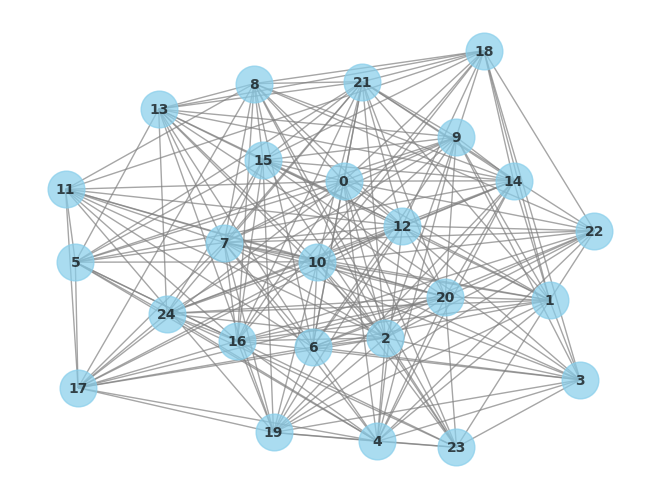

In [ ]:
generate_graph(25,True)

## First Implementation: Exaustive Search trough Recursion
In the file named **1_exaustive_recursive.cpp** , we use the exaustive search to enumerate all cliques in the graph, and keep in memory the largest clique found.

**Recursive Formula for Cliques**

*Base Case*:

For each vertex $v \in V$, a single vertex is a clique:
$$
 C(v) = \{v\}
$$

*Recursive Case:*

A set of vertices $V'$ forms a clique if, when combined with any other vertex in the set, they still form a clique:
$$C(V') = \{v\} \cup C(V' - \{v\}) $$
where $V'$ is a set of vertices, $v$ is a vertex in $V'$, and $V' - \{v\}$ represents the set $V'$ with $v$ removed.


The implementation code can be seen here:

```cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>

using namespace std;

bool biggerThan(int a, int b) {
    return a < b;
}

vector<vector<int>> ReadGraph(const std::string& fileName, int& numVertex) {
    ifstream file(fileName);
    int numEdges;
    file >> numVertex >> numEdges;

    vector<vector<int>> graph(numVertex, vector<int>(numVertex, 0));

    for (int i = 0; i < numEdges; ++i) {
        int u, v;
        file >> u >> v;
        graph[u - 1][v - 1] = 1;
        graph[v - 1][u - 1] = 1;  // O graph é não direcionado
    }

    file.close();

    return graph;
}

bool isClique(vector<int>& candidate, vector<vector<int>>& graph) {
    int n = candidate.size();
    for (int i = 0; i < n; ++i) {
        for (int j = i + 1; j < n; ++j) {
            if (graph[candidate[i]][candidate[j]] == 0) {
                return false;
            }
        }
    }
    return true;
}

void FindAllMaximalCliques(vector<vector<int>>& graph, vector<int>& candidates, vector<int>& currentClique, vector<int>& maximalClique) {
    if (candidates.empty()) {
        if (currentClique.size() > maximalClique.size() && isClique(currentClique, graph)) {
            maximalClique = currentClique;
        }
        return;
    }

    int v = candidates.back();
    candidates.pop_back();

    // Include vertex v in the current clique
    currentClique.push_back(v);

    // Find all maximal cliques including v
    vector<int> newCandidates;
    for (int u : candidates) {
        if (graph[v][u] == 1) {
            newCandidates.push_back(u);
        }
    }
    FindAllMaximalCliques(graph, newCandidates, currentClique, maximalClique);

    // Exclude vertex v from the current clique
    currentClique.pop_back();

    // Find all maximal cliques without v
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);

    candidates.push_back(v);
}

vector<int> FindMaximalClique(vector<vector<int>>& graph) {
    int numVertex = graph.size();
    vector<int> candidates;
    for (int i = 0; i < numVertex; ++i) {
        candidates.push_back(i);
    }
    vector<int> currentClique;
    vector<int> maximalClique;
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);
    return maximalClique;
}

int main() {
    int numVertex;
    vector<vector<int>> graph;

    graph = ReadGraph("implementations/graph.txt", numVertex);
    vector<int> maximalClique = FindMaximalClique(graph);
    sort(maximalClique.begin(),maximalClique.end(),biggerThan);
    cout << "[Implementation-Recursive] Clique's Size: " << maximalClique.size() << " Maximal Clique: ";
    for (int v : maximalClique) {
        cout << v + 1 << " ";
    }
    cout << endl;

    return 0;
}

```

### Testing the implementation results
Comparing the results of the Recursive implementation against verification to compare the results.

In [ ]:
!g++ -Wall -O3 -g implementations/1_exaustive_recursive.cpp -o 1_exaustive_recursive

In [ ]:
import pandas as pd
import time
import subprocess
import matplotlib.pyplot as plt
recursive = []
verification = []
tamanhos = [5, 10, 25, 50, 75, 100]  # Add more sizes if needed

# Create an empty DataFrame
df = pd.DataFrame(columns=['Node Size', 'Recursive Max Clique Size', 'Verification Max Clique Size'])

for size in tamanhos:
    generate_graph(size, False)

    proc_recursive = subprocess.run(['./1_exaustive_recursive'], text=True, capture_output=True)
    recursive.append(proc_recursive.stdout.split(":")[1].split(" ")[1])

    proc_verification = subprocess.run(['python', 'python/verify_clique.py'], text=True, capture_output=True)
    verification.append(proc_verification.stdout.split(":")[1].split(" ")[1])

# Append the results to the DataFrame
df['Node Size'] = tamanhos
df["Recursive Max Clique Size"] = recursive
df['Verification Max Clique Size'] = verification

# Print the DataFrame
df


,Node Size,Recursive Max Clique Size,Verification Max Clique Size
0,5,4,4
1,10,7,7
2,25,8,8
3,50,12,12
4,75,13,13
5,100,14,14


As we can see for the table above, the implementation is obtaining the optimal solution for the problem in all the cases tested.
On other hand, we can see that for graph sizes more than 130 nodes, the computational time of processing becomes greater, what is in fact a big problem, since the biggest counterpoint of exaustive Implementations is it exponential behaviors, which implies that as greater the size of the input of the problem, greater will be the time to process the entire solution, turning harder to use this implementations in real world problems.

## Second implementation: Greedy Heuristics based on Degree
Although the recursive approach always give us the optimal solution, its time grows exponentially accordlying the size of the graph.
Furthermore, we can use the number of the degree of each vertex (descending order), to iterate first each vertex with more edges to try to achieve results near the optimal solution.

We can use the following pseudo code to base our implementation:

### Degree-Based Heuristic for Maximal Clique

Let $ G = (V, E) $ be an undirected graph with vertices $ V $ and edges $ E $. The degree-based heuristic for finding a maximal clique is as follows:

1. For each vertex v in the graph:
    - Calculate the degree of v.
    - Create a structure for v with id = v and edges = degree of v.
    - Add the structure to the list of candidates.

2. Order the list of candidates in descending order based on their edges.

3. Initialize an empty set C to store the vertices of the maximal clique.

4. For each vertex in the ordered list of candidates:
    - Initialize an empty list localCandidates to store nodes.
    - Initialize an empty list Clique to store vertices.
    - While localCandidates is not empty:
        - Pop a node u from localCandidates.
        - Check if adding u to Clique violates the clique property.
        - If not, add u.id to Clique.
        - Update localCandidates to include only nodes adjacent to all vertices in Clique.
    - Rotate the list of candidates.

5. The set C now represents a maximal clique in the graph.

**Furthermore, the code implementation is the following**:

```cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>

using namespace std;

struct node {
    int id;
    int edges;
};

bool biggerThan(int a, int b){
    return a < b;
}

bool biggerEdges(node a, node b){
    return a.edges < b.edges;
}

vector<vector<int>> ReadGraph(const std::string& fileName, int& numVertex) {
    ifstream file(fileName);
    int numEdges;
    file >> numVertex >> numEdges;

    vector<vector<int>> graph(numVertex, vector<int>(numVertex, 0));

    for (int i = 0; i < numEdges; ++i) {
        int u, v;
        file >> u >> v;
        graph[u - 1][v - 1] = 1;
        graph[v - 1][u - 1] = 1;  // O graph é não direcionado
    }
    file.close();

    return graph;
}

vector<int> FindMaximalClique(vector<vector<int>>& graph, int numVertex) {
    vector<int> MaximalClique;
    vector<node> candidates;

    // In the beginning, all nodes are possible candidates
    for (int i = 0; i < numVertex; ++i) {
        node candidate;
        candidate.id = i;
        candidate.edges = 0;
        int edges = 0;
        for (int j = 0; j < numVertex; j++){
            edges += graph[j][i];
        }
        candidate.edges = edges;
        candidates.push_back(candidate);
    }
    
    sort(candidates.begin(), candidates.end(), biggerEdges);

    for (int i = 0; i < numVertex; ++i) {
        vector<node> localCandidates = candidates;
        vector<int> Clique;
        while (!localCandidates.empty()) {
            node v = localCandidates.back();
            localCandidates.pop_back();
            bool canAdd = true;

            for (int u : Clique) {
                if (graph[u][v.id] == 0) {
                    canAdd = false;
                    break;
                }
            }

            if (canAdd) {
                Clique.push_back(v.id);
                vector<node> newLocalCandidates;
                for (node u : localCandidates) {
                    bool adjacentToAll = true;
                    for (int c : Clique) {
                        if (graph[u.id][c] == 0) {
                            adjacentToAll = false;
                            break;
                        }
                    }
                    if (adjacentToAll) {
                        newLocalCandidates.push_back(u);
                    }
                }
                localCandidates = newLocalCandidates;
            }
        }

        // Rotate candidates after the while loop in the for loop
        std::rotate(candidates.begin(), candidates.end() - 1, candidates.end());

        // Check if the size of the current clique is larger than the existing maximal clique
        if (MaximalClique.size() < Clique.size()) {
            MaximalClique = Clique;
        }
    }

    return MaximalClique;
}


int main() {
    int numVertex;
    vector<vector<int>> graph;

    graph = ReadGraph("implementations/graph.txt", numVertex);
    vector<int> maximalClique = FindMaximalClique(graph, numVertex);
    sort(maximalClique.begin(),maximalClique.end(),biggerThan);

    cout << "[Implementation-Heuristics] Clique's Size: "<< maximalClique.size() << " Maximal Clique: ";
    for (int v : maximalClique) {
        cout << v+1 << " ";
    }
    cout << endl;

    return 0;
}
```

### Testing the implementation of Heuristics implementation
Comparing the results of the Heuristics implementation against verification and Exaustive implementations to see it's efficiency and time reduction.

In [ ]:
!g++ -Wall -O3 -g implementations/3_edges_heuristic.cpp -o 3_edges_heuristic

In [ ]:
import pandas as pd
import time
import subprocess
import matplotlib.pyplot as plt

heuristics_cliques = []
recursive_cliques = []
verification_cliques = []
heuristics_times = []
recursive_times = []
verification_times = []
tamanhos = list(range(10,140,10))

# Create an empty DataFrame
df = pd.DataFrame(columns=['Graph Size', 'Recursive Max Clique Size', 'Verification Max Clique Size','Heuristics Max Clique Size'])

for size in tamanhos:
    generate_graph(size, False)

    start = time.perf_counter()
    proc_heuristics = subprocess.run(['./3_edges_heuristic'], text=True, capture_output=True)
    end = time.perf_counter()
    heuristics_times.append(end-start)
    heuristics_cliques.append(int(proc_heuristics.stdout.split(":")[1].split(" ")[1]))


    start = time.perf_counter()
    proc_recursive = subprocess.run(['./1_exaustive_recursive'], text=True, capture_output=True)
    end = time.perf_counter()
    recursive_times.append(end-start)
    recursive_cliques.append(int(proc_recursive.stdout.split(":")[1].split(" ")[1]))

    start = time.perf_counter()
    proc_verification = subprocess.run(['python', 'python/verify_clique.py'], text=True, capture_output=True)
    end = time.perf_counter()
    verification_times.append(end-start)
    verification_cliques.append(int(proc_verification.stdout.split(":")[1].split(" ")[1]))


df['Graph Size'] = tamanhos
df["Recursive Max Clique Size"] = recursive_cliques
df['Verification Max Clique Size'] = verification_cliques
df['Heuristics Max Clique Size'] = heuristics_cliques
df["Accuracy Rate of Heuristics"] = 100 * (1 - (df['Verification Max Clique Size'] - df['Heuristics Max Clique Size']) / df['Verification Max Clique Size'])


df


,Graph Size,Recursive Max Clique Size,Verification Max Clique Size,Heuristics Max Clique Size,Accuracy Rate of Heuristics
0,10,5,5,5,100.000000
1,20,8,8,8,100.000000
2,30,10,10,10,100.000000
3,40,10,10,10,100.000000
4,50,10,10,10,100.000000
5,60,13,13,13,100.000000
6,70,13,13,12,92.307692
7,80,14,14,12,85.714286
8,90,14,14,13,92.857143
9,100,14,14,13,92.857143


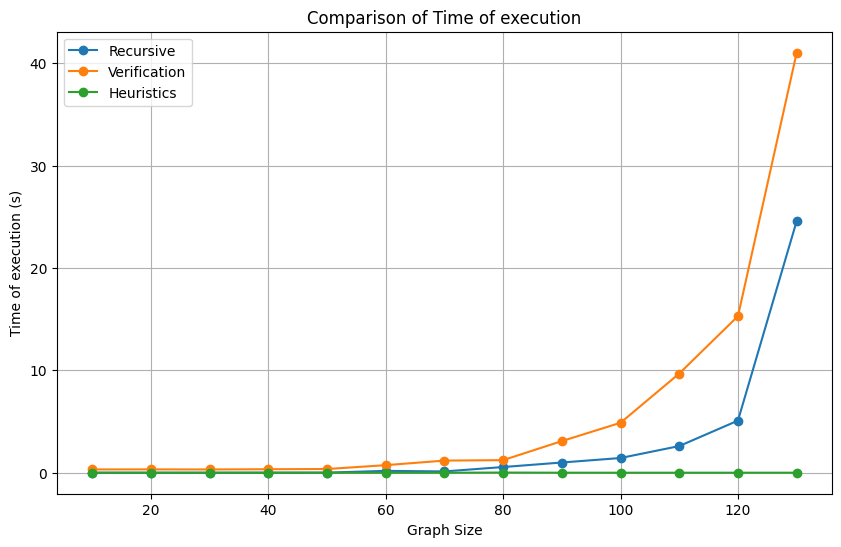

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Graph Size'], recursive_times, label='Recursive', marker='o')
plt.plot(df['Graph Size'], verification_times, label='Verification', marker='o')
plt.plot(df['Graph Size'], heuristics_times, label='Heuristics', marker='o')

plt.xlabel('Graph Size')
plt.ylabel('Time of execution (s)')
plt.title('Comparison of Time of execution')
plt.legend()
plt.grid(True)
plt.show()

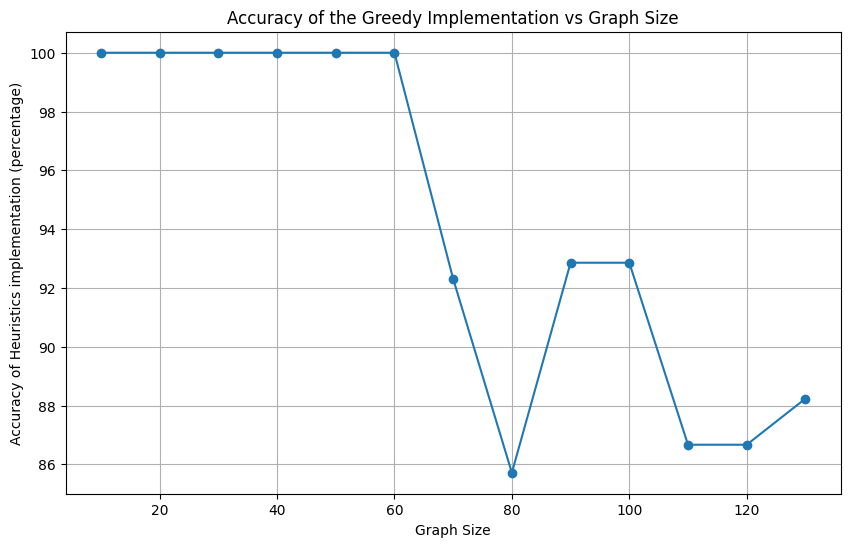

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Graph Size'], df["Accuracy Rate of Heuristics"], marker='o')

plt.xlabel('Graph Size')
plt.ylabel('Accuracy of Heuristics implementation (percentage)')
plt.title('Accuracy of the Greedy Implementation vs Graph Size')
plt.grid(True)
plt.show()

**As seen by the table above, the greedy algorithm  has a good accuracy rate, with rates above 85% in almost all graph sizes, with a enormous advantage in the time of execution as seen the plot comparing it. In sum, is possible to conclude that the Greedy Algorithm has good results in front of the reduction of time in the execution. Also, we can see that even in graphs with great size (100>), and still has good levels of accuracy with 85%.**

## Third Implementation: Dynamic Programming to decrease time in the exaustive implementation

We can try to decrease time in the exaustive implementation using Dynamic Programming (memoization) to memorize cliques already seen in the algorithm, with the goal of reducing part of the time of execution.
To acomplish it, we can create a auxiliar data strucuture to memorize cliques iterated.

```cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>

using namespace std;

bool biggerThan(int a, int b) {
    return a < b;
}

// Memoization table for isClique function
vector<vector<int>> memoTable;

vector<vector<int>> ReadGraph(const std::string& fileName, int& numVertex) {
    ifstream file(fileName);
    int numEdges;
    file >> numVertex >> numEdges;

    vector<vector<int>> graph(numVertex, vector<int>(numVertex, 0));

    for (int i = 0; i < numEdges; ++i) {
        int u, v;
        file >> u >> v;
        graph[u - 1][v - 1] = 1;
        graph[v - 1][u - 1] = 1;  // O graph é não direcionado
    }

    file.close();

    return graph;
}

bool isClique(vector<int>& candidate, vector<vector<int>>& graph) {
    int n = candidate.size();
    
    // Check if the result is already memoized
    if (!memoTable[n].empty()) {
        return memoTable[n][candidate.back()];
    }

    for (int i = 0; i < n; ++i) {
        for (int j = i + 1; j < n; ++j) {
            if (graph[candidate[i]][candidate[j]] == 0) {
                // Memoize the result before returning
                memoTable[n][candidate.back()] = false;
                return false;
            }
        }
    }

    // Memoize the result before returning
    memoTable[n][candidate.back()] = true;
    return true;
}

void FindAllMaximalCliques(vector<vector<int>>& graph, vector<int>& candidates, vector<int>& currentClique, vector<int>& maximalClique) {
    if (candidates.empty()) {
        if (currentClique.size() > maximalClique.size() && isClique(currentClique, graph)) {
            maximalClique = currentClique;
        }
        return;
    }

    int v = candidates.back();
    candidates.pop_back();

    // Include vertex v in the current clique
    currentClique.push_back(v);

    // Find all maximal cliques including v
    vector<int> newCandidates;
    for (int u : candidates) {
        if (graph[v][u] == 1) {
            newCandidates.push_back(u);
        }
    }
    FindAllMaximalCliques(graph, newCandidates, currentClique, maximalClique);

    // Exclude vertex v from the current clique
    currentClique.pop_back();

    // Find all maximal cliques without v
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);

    candidates.push_back(v);
}

vector<int> FindMaximalClique(vector<vector<int>>& graph) {
    int numVertex = graph.size();
    vector<int> candidates;
    for (int i = 0; i < numVertex; ++i) {
        candidates.push_back(i);
    }
    vector<int> currentClique;
    vector<int> maximalClique;
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);
    return maximalClique;
}

int main() {
    int numVertex;
    vector<vector<int>> graph;

    // Initialize the memoization table

    graph = ReadGraph("implementations/graph.txt", numVertex);
    memoTable.resize(numVertex, vector<int>(numVertex, -1));
    vector<int> maximalClique = FindMaximalClique(graph);
    sort(maximalClique.begin(),maximalClique.end(),biggerThan);
    cout << "[Implementation-Dynamic] Clique's Size: " << maximalClique.size() << " Maximal Clique: ";
    for (int v : maximalClique) {
        cout << v + 1 << " ";
    }
    cout << endl;

    return 0;
}

```

### Comparing its time effiency
We can compare its time efficiency against the Recursive implementation (without memoization) to compare if there is improvement in the time execution.

In [ ]:
!g++ -Wall -O3 -g implementations/4_dynamic_programming.cpp -o 4_dynamic_programming

In [ ]:
recursive_times = []
dynamic_times = []
recursive_cliques= []
dynamic_cliques = []
tamanhos = list(range(10,170,10))

# Create an empty DataFrame
df = pd.DataFrame(columns=['Graph Size', 'Recursive Clique', 'Dynamic Programming Clique'])

for size in tamanhos:
    generate_graph(size, False)

    start = time.perf_counter()
    proc_recursive = subprocess.run(['./1_exaustive_recursive'], text=True, capture_output=True)
    end = time.perf_counter()
    recursive_times.append(end-start)
    recursive_cliques.append(int(proc_recursive.stdout.split(":")[1].split(" ")[1]))

    start = time.perf_counter()
    proc_verification = subprocess.run(['./4_dynamic_programming'], text=True, capture_output=True)
    end = time.perf_counter()
    dynamic_times.append(end-start)
    dynamic_cliques.append(int(proc_verification.stdout.split(":")[1].split(" ")[1]))

df['Graph Size'] = tamanhos
df["Recursive Clique"] = recursive_cliques
df['Dynamic Programming Clique'] = dynamic_cliques
df

,Graph Size,Recursive Clique,Dynamic Programming Clique
0,10,4,4
1,20,8,8
2,30,9,9
3,40,10,10
4,50,12,12
5,60,13,13
6,70,12,12
7,80,15,15
8,90,14,14
9,100,15,15


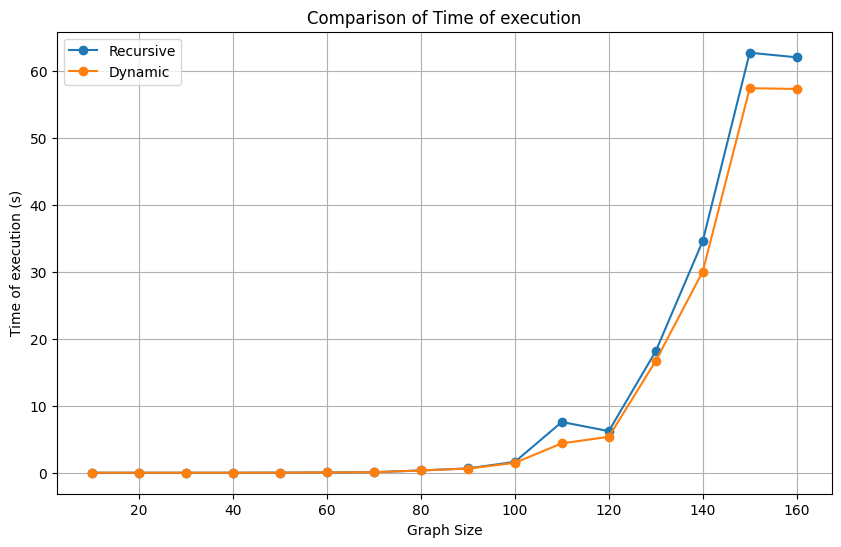

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Graph Size'], recursive_times, label='Recursive', marker='o')
plt.plot(df['Graph Size'], dynamic_times, label='Dynamic', marker='o')

plt.xlabel('Graph Size')
plt.ylabel('Time of execution (s)')
plt.title('Comparison of Time of execution')
plt.legend()
plt.grid(True)
plt.show()

Using Memoization, is possible to reduce time in the implementation of the exaustive algorithm, but, as we can see in the plot above, there isn't enormous advantages yet.

## Fourth Implementation: Parallel Exaustive Approach
We can try to parallelize portions of the code in the Exaustive approach to get improvements in its time efficiency.
To accomplish it, we can use the **OpenMP** library for C++.

As we are using a recursive approach, a parallelization strategy will not be effective in all portions of the code due to internal calls that can have the opposite effect to that desired.

Thus, we're going to parallelize the following parts of the recursive approach:

1 - Reading the raw graph text file:
```cpp
vector<vector<int>> ReadGraph(const std::string& fileName, int& numVertex) {
    ifstream file(fileName);
    int numEdges;
    file >> numVertex >> numEdges;

    vector<vector<int>> graph(numVertex, vector<int>(numVertex, 0));

    #pragma omp parallel for
    for (int i = 0; i < numEdges; ++i) {
        int u, v;
        #pragma omp critical
        file >> u >> v;
        graph[u - 1][v - 1] = 1;
        graph[v - 1][u - 1] = 1;  // O graph é não direcionado
    }
    file.close();

    return graph;
}
```

2 - Verification if the set of candidates is a clique or not:

```cpp
bool isClique(vector<int>& candidate, vector<vector<int>>& graph) {
    int n = candidate.size();
    bool clique = true;
    #pragma omp parallel for shared(clique) collapse(2)
    for (int i = 0; i < n; ++i) {
        for (int j = i + 1; j < n; ++j) {
            if (graph[candidate[i]][candidate[j]] == 0) {
                #pragma omp critical
                clique = false;
            }
        }    
    }
    return clique;
}
```

The others parts although is possible to be parallelized, is hardly to obtain time reduction, mainly because that in the recursive algorithms, the main way to parallelize some sections is creating **tasks**, which in this case, isn't a good solution, since the side effects are more likely to slow the execution because the as the graph sizes grows it turns hard to fork and join in results efficiently, to keep the optimal solution.

The source code of this implementation if below:

```cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>
#include <omp.h>

using namespace std;

bool biggerThan(int a, int b) {
    return a < b;
}

vector<vector<int>> ReadGraph(const std::string& fileName, int& numVertex) {
    ifstream file(fileName);
    int numEdges;
    file >> numVertex >> numEdges;

    vector<vector<int>> graph(numVertex, vector<int>(numVertex, 0));

    #pragma omp parallel for
    for (int i = 0; i < numEdges; ++i) {
        int u, v;
        #pragma omp critical
        file >> u >> v;
        graph[u - 1][v - 1] = 1;
        graph[v - 1][u - 1] = 1;  // O graph é não direcionado
    }
    file.close();

    return graph;
}

bool isClique(vector<int>& candidate, vector<vector<int>>& graph) {
    int n = candidate.size();
    bool clique = true;
    #pragma omp parallel for shared(clique) collapse(2)
    for (int i = 0; i < n; ++i) {
        for (int j = i + 1; j < n; ++j) {
            if (graph[candidate[i]][candidate[j]] == 0) {
                #pragma omp critical
                clique = false;
            }
        }    
    }
    return clique;
}

void FindAllMaximalCliques(vector<vector<int>>& graph, vector<int>& candidates, vector<int>& currentClique, vector<int>& maximalClique) {
    if (candidates.empty()) {
        if (currentClique.size() > maximalClique.size() && isClique(currentClique, graph)) {
            maximalClique = currentClique;
        }
        return;
    }

    int v = candidates.back();
    candidates.pop_back();

    // Include vertex v in the current clique
    currentClique.push_back(v);

    // Find all maximal cliques including v
    
    vector<int> newCandidates;
    for (int u : candidates) {
        if (graph[v][u] == 1) {
            newCandidates.push_back(u);
        }
    }

    
    FindAllMaximalCliques(graph, newCandidates, currentClique, maximalClique);

    // Exclude vertex v from the current clique
    currentClique.pop_back();

    // Find all maximal cliques without v

    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);


    candidates.push_back(v);
}

vector<int> FindMaximalClique(vector<vector<int>>& graph) {
    int numVertex = graph.size();
    vector<int> candidates;
    #pragma omp parallel for
    for (int i = 0; i < numVertex; ++i) {
        #pragma omp critical
        candidates.push_back(i);
    }
    vector<int> currentClique;
    vector<int> maximalClique;
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);
    return maximalClique;
}

int main() {
    int numVertex;
    vector<vector<int>> graph;
    omp_set_num_threads(10);
    graph = ReadGraph("implementations/graph.txt", numVertex);
    vector<int> maximalClique = FindMaximalClique(graph);
    sort(maximalClique.begin(),maximalClique.end(),biggerThan);
    cout << "[Implementation-Recursive Parallel] Clique's Size: " << maximalClique.size() << " Maximal Clique: ";
    for (int v : maximalClique) {
        cout << v + 1 << " ";
    }
    cout << endl;

    return 0;
}

```

In [ ]:
!g++ -Wall -O3 -fopenmp implementations/5_exaustive_recursive_parallel.cpp -o 5_exaustive_recursive_parallel


In [ ]:
recursive_times = []
parallel_times = []
recursive_cliques= []
parallel_cliques = []
tamanhos = list(range(10,130,5))

# Create an empty DataFrame
df = pd.DataFrame(columns=['Graph Size', 'Recursive Clique', 'Parallel Recursive Clique'])

for size in tamanhos:
    generate_graph(size, False)

    start = time.perf_counter()
    proc_recursive = subprocess.run(['./1_exaustive_recursive'], text=True, capture_output=True)
    end = time.perf_counter()
    recursive_times.append(end-start)
    recursive_cliques.append(int(proc_recursive.stdout.split(":")[1].split(" ")[1]))

    start = time.perf_counter()
    proc_verification = subprocess.run(['./5_exaustive_recursive_parallel'], text=True, capture_output=True)
    end = time.perf_counter()
    parallel_times.append(end-start)
    parallel_cliques.append(int(proc_verification.stdout.split(":")[1].split(" ")[1]))

df['Graph Size'] = tamanhos
df["Recursive Clique"] = recursive_cliques
df['Parallel Recursive Clique'] = parallel_cliques
df

,Graph Size,Recursive Clique,Parallel Recursive Clique
0,10,5,5
1,15,5,5
2,20,7,7
3,25,8,8
4,30,10,10
5,35,10,10
6,40,10,10
7,45,12,12
8,50,11,11
9,55,12,12


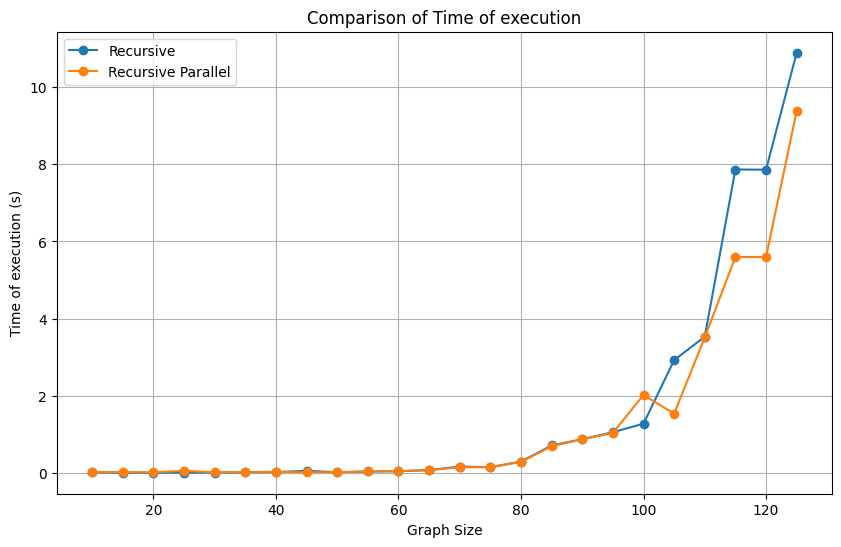

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Graph Size'], recursive_times, label='Recursive', marker='o')
plt.plot(df['Graph Size'], parallel_times, label='Recursive Parallel', marker='o')

plt.xlabel('Graph Size')
plt.ylabel('Time of execution (s)')
plt.title('Comparison of Time of execution')
plt.legend()
plt.grid(True)
plt.show()

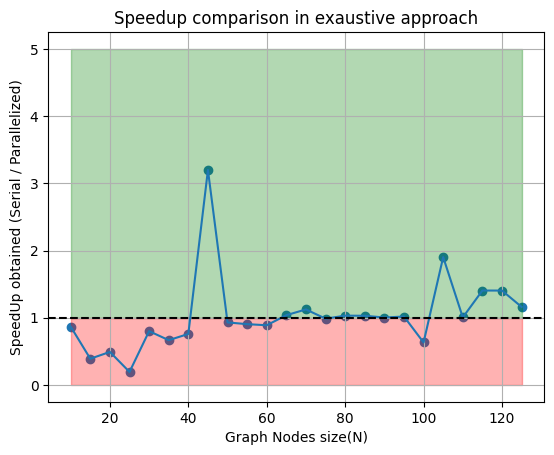

In [ ]:
import numpy as np
plt.plot(tamanhos,np.array(recursive_times) / np.array(parallel_times))
plt.scatter(tamanhos,np.array(recursive_times) / np.array(parallel_times))
plt.title("Speedup comparison in exaustive approach")
plt.xlabel("Graph Nodes size(N)")
plt.ylabel("SpeedUp obtained (Serial / Parallelized)")
plt.axhline(y=1, color='black', linestyle='--', label='Baseline (Speedup = 1)')
midpoint = len(tamanhos) // 2
speedup = np.array(parallel_times) / np.array(recursive_times)
plt.fill_between(tamanhos, 1, 5, color='green', alpha=0.3, label='Fill Region')
plt.fill_between(tamanhos, 0, 1, color='red', alpha=0.3, label='Fill Region')
plt.grid(True)
plt.show()

In [ ]:
speedup = np.array(recursive_times) / np.array(parallel_times)
average_speedup = np.mean(speedup)

# Calculate the average speedup percentage
average_speedup_percentage = ((average_speedup - 1) / average_speedup) * 100
print(f"The average Speedup obtained by parallel Implementaion was: {average_speedup_percentage:.2f}%")

The average Speedup obtained by parallel Implementaion was: 3.32%


**As we can see by the table and plots above, the Parallel Implementation improve slightly the performance, giving us an average Speedup of ± 3.32%, but more important is that this gain of performance appears mainly in the graphs with great sizes. This give to us a good impression that is possible to reduce the time of the implementation using this tecnique**.

#Sixth implementation: Parallel Dynamic Programming

Parallelizing the Memoization implementation is expected to give us more performance. Furthermore, we're going to parallelize the same sections of the fifth implementation, but keeping the memoization tecnique.

```cpp
# include <iostream>
# include <fstream>
# include <vector>
# include <string>
# include <cmath>
# include <algorithm>

using namespace std;

bool biggerThan(int a, int b) {
    return a < b;
}

// Memoization table for isClique function
vector<vector<int>> memoTable;

vector<vector<int>> ReadGraph(const std::string& fileName, int& numVertex) {
    ifstream file(fileName);
    int numEdges;
    file >> numVertex >> numEdges;

    vector<vector<int>> graph(numVertex, vector<int>(numVertex, 0));

    #pragma omp parallel for
    for (int i = 0; i < numEdges; ++i) {
        int u, v;
        #pragma omp critical
        file >> u >> v;
        graph[u - 1][v - 1] = 1;
        graph[v - 1][u - 1] = 1;  // O graph é não direcionado
    }

    file.close();

    return graph;
}

bool isClique(vector<int>& candidate, vector<vector<int>>& graph) {
    int n = candidate.size();
    bool clique = true;
    // Check if the result is already memoized
    if (!memoTable[n].empty()) {
        return memoTable[n][candidate.back()];
    }

    #pragma omp parallel for shared(clique) collapse(2)
    for (int i = 0; i < n; ++i) {
        for (int j = i + 1; j < n; ++j) {
            if (graph[candidate[i]][candidate[j]] == 0) {
                // Memoize the result before returning
                #pragma omp critical
                clique = false;
            }
        }
    }
    // Memoize the result before returning
    memoTable[n][candidate.back()] = clique;
    return clique;
}

void FindAllMaximalCliques(vector<vector<int>>& graph, vector<int>& candidates, vector<int>& currentClique, vector<int>& maximalClique) {
    if (candidates.empty()) {
        if (currentClique.size() > maximalClique.size() && isClique(currentClique, graph)) {
            maximalClique = currentClique;
        }
        return;
    }

    int v = candidates.back();
    candidates.pop_back();

    // Include vertex v in the current clique
    currentClique.push_back(v);

    // Find all maximal cliques including v
    vector<int> newCandidates;
    for (int u : candidates) {
        if (graph[v][u] == 1) {
            newCandidates.push_back(u);
        }
    }
    FindAllMaximalCliques(graph, newCandidates, currentClique, maximalClique);

    // Exclude vertex v from the current clique
    currentClique.pop_back();

    // Find all maximal cliques without v
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);

    candidates.push_back(v);
}

vector<int> FindMaximalClique(vector<vector<int>>& graph) {
    int numVertex = graph.size();
    vector<int> candidates;
    #pragma omp parallel for
    for (int i = 0; i < numVertex; ++i) {
        #pragma omp critical
        candidates.push_back(i);
    }
    vector<int> currentClique;
    vector<int> maximalClique;
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);
    return maximalClique;
}

int main() {
    int numVertex;
    vector<vector<int>> graph;

    // Initialize the memoization table

    graph = ReadGraph("implementations/graph.txt", numVertex);
    memoTable.resize(numVertex, vector<int>(numVertex, -1));
    vector<int> maximalClique = FindMaximalClique(graph);
    sort(maximalClique.begin(),maximalClique.end(),biggerThan);
    cout << "[Implementation-Dynamic Parallel] Clique's Size: " << maximalClique.size() << " Maximal Clique: ";
    for (int v : maximalClique) {
        cout << v + 1 << " ";
    }
    cout << endl;

    return 0;
}
```

In [ ]:
!g++ -Wall -O3 -g -fopenmp implementations/7_dynamic_programming_parallel.cpp -o 7_dynamic_programming_parallel

In [ ]:
recursive_times = []
parallel_times = []
dynamic_times = []
parallel_dynamic_times = []
recursive_cliques= []
parallel_cliques = []
dynamic_cliques = []
parallel_dynamic_cliques = []
tamanhos = list(range(10,130,5))

# Create an empty DataFrame
df = pd.DataFrame(columns=['Graph Size', 'Recursive Clique', 'Parallel Recursive Clique'])

for size in tamanhos:
    generate_graph(size, False)

    start = time.perf_counter()
    proc_recursive = subprocess.run(['./1_exaustive_recursive'], text=True, capture_output=True)
    end = time.perf_counter()
    recursive_times.append(end-start)
    recursive_cliques.append(int(proc_recursive.stdout.split(":")[1].split(" ")[1]))

    start = time.perf_counter()
    proc_recursive = subprocess.run(['./4_dynamic_programming'], text=True, capture_output=True)
    end = time.perf_counter()
    dynamic_times.append(end-start)
    dynamic_cliques.append(int(proc_recursive.stdout.split(":")[1].split(" ")[1]))

    start = time.perf_counter()
    proc_verification = subprocess.run(['./5_exaustive_recursive_parallel'], text=True, capture_output=True)
    end = time.perf_counter()
    parallel_times.append(end-start)
    parallel_cliques.append(int(proc_verification.stdout.split(":")[1].split(" ")[1]))

    start = time.perf_counter()
    proc_recursive = subprocess.run(['./7_dynamic_programming_parallel'], text=True, capture_output=True)
    end = time.perf_counter()
    parallel_dynamic_times.append(end-start)
    parallel_dynamic_cliques.append(int(proc_recursive.stdout.split(":")[1].split(" ")[1]))

df['Graph Size'] = tamanhos
df["Recursive Clique"] = recursive_cliques
df['Parallel Recursive Clique'] = parallel_cliques
df['Dynamic Clique'] = dynamic_cliques
df['Parallel Dynamic Clique'] = parallel_dynamic_cliques
df

,Graph Size,Recursive Clique,Parallel Recursive Clique,Dynamic Clique,Parallel Dynamic Clique
0,10,5,5,5,5
1,15,6,6,6,6
2,20,8,8,8,8
3,25,9,9,9,9
4,30,10,10,10,10
5,35,9,9,9,9
6,40,11,11,11,11
7,45,11,11,11,11
8,50,11,11,11,11
9,55,13,13,13,13


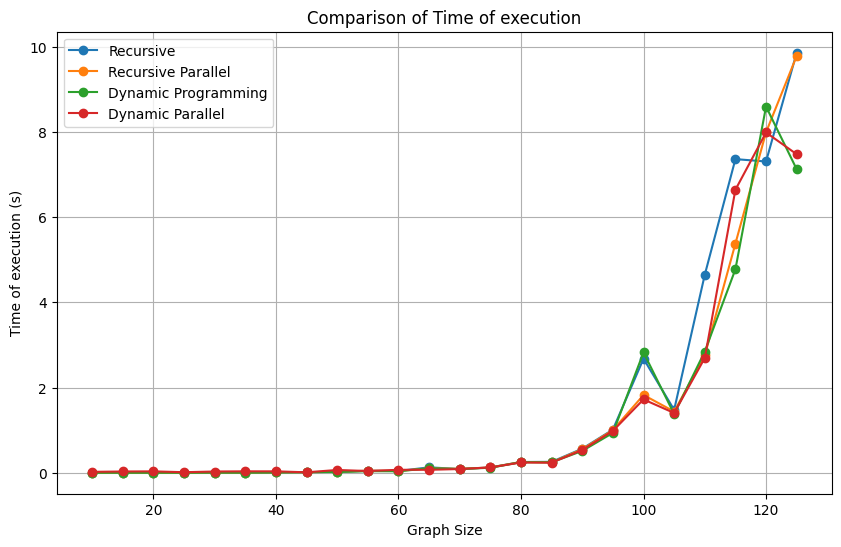

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Graph Size'], recursive_times, label='Recursive', marker='o')
plt.plot(df['Graph Size'], parallel_times, label='Recursive Parallel', marker='o')
plt.plot(df['Graph Size'], dynamic_times, label='Dynamic Programming', marker='o')
plt.plot(df['Graph Size'], parallel_dynamic_times, label='Dynamic Parallel', marker='o')

plt.xlabel('Graph Size')
plt.ylabel('Time of execution (s)')
plt.title('Comparison of Time of execution')
plt.legend()
plt.grid(True)
plt.show()

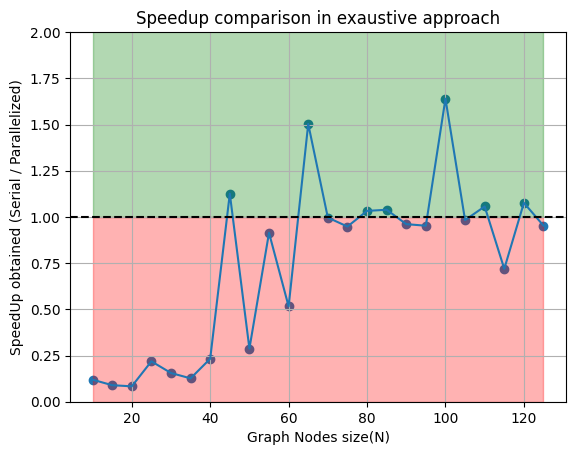

In [ ]:
import numpy as np
plt.plot(tamanhos,np.array(dynamic_times) / np.array(parallel_dynamic_times))
plt.scatter(tamanhos,np.array(dynamic_times) / np.array(parallel_dynamic_times))
plt.title("Speedup comparison in exaustive approach")
plt.xlabel("Graph Nodes size(N)")
plt.ylabel("SpeedUp obtained (Serial / Parallelized)")
plt.axhline(y=1, color='black', linestyle='--', label='Baseline (Speedup = 1)')
midpoint = len(tamanhos) // 2
speedup = np.array(parallel_dynamic_times) / np.array(dynamic_times)
plt.fill_between(tamanhos, 1, 5, color='green', alpha=0.3, label='Fill Region')
plt.fill_between(tamanhos, 0, 1, color='red', alpha=0.3, label='Fill Region')
plt.grid(True)
plt.ylim([0,2])
plt.show()

In [ ]:
speedup = np.array(dynamic_times) / np.array(parallel_dynamic_times)
average_speedup = np.mean(speedup)

# Calculate the average speedup percentage
average_speedup_percentage = ((average_speedup - 1) / average_speedup) * 100
print(f"The average Speedup obtained by Dynamic parallel Implementaion was: {average_speedup_percentage:.2f}%")

The average Speedup obtained by Dynamic parallel Implementaion was: -35.38%


**As seen for the plots above, parallelizing the Dynamic implementation don't give us an enormous gain in performance. On other hand, is possible to see that in graphs with greater size, the performance is slightly better.**

## Seventh Implementation: Using MPI and Slurm to implement Distributed Computing Implementation

Using a cluster with two computer nodes of 4 CPU each, we can designed a solution that distributed the work of process Cliques in a graph, trying to improve the performance, or at least reach in approximate results that garantee good accuracy.

The first implementation will be simple and direct: Distribute the entire graph to each core and each will try to find the same Maximal Clique, confirming it at the Rank 0. This first implementation aims to be a confirmation and a benchmark of the optimal solution to compare to the other implementation.

The code of this implementation is above:

```cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>
#include <mpi.h>

using namespace std;

bool biggerThan(int a, int b) {
    return a < b;
}

vector<vector<int>> ReadGraph(const std::string& fileName, int& numVertex, int& numEdges) {
    ifstream file(fileName);
    file >> numVertex >> numEdges;

    vector<vector<int>> graph(numVertex, vector<int>(numVertex, 0));

    for (int i = 0; i < numEdges; ++i) {
        int u, v;
        file >> u >> v;
        graph[u - 1][v - 1] = 1;
        graph[v - 1][u - 1] = 1;  // The graph is undirected
    }

    file.close();

    return graph;
}

bool isClique(vector<int>& candidate, vector<vector<int>>& graph) {
    int n = candidate.size();
    for (int i = 0; i < n; ++i) {
        for (int j = i + 1; j < n; ++j) {
            if (graph[candidate[i]][candidate[j]] == 0) {
                return false;
            }
        }
    }
    return true;
}

void FindAllMaximalCliques(vector<vector<int>>& graph, vector<int>& candidates, vector<int>& currentClique, vector<int>& maximalClique) {
    if (candidates.empty()) {
        if (currentClique.size() > maximalClique.size() && isClique(currentClique, graph)) {
            maximalClique = currentClique;
        }
        return;
    }

    int v = candidates.back();
    candidates.pop_back();

    // Include vertex v in the current clique
    currentClique.push_back(v);

    // Find all maximal cliques including v
    vector<int> newCandidates;
    for (int u : candidates) {
        if (graph[v][u] == 1) {
            newCandidates.push_back(u);
        }
    }
    FindAllMaximalCliques(graph, newCandidates, currentClique, maximalClique);

    // Exclude vertex v from the current clique
    currentClique.pop_back();

    // Find all maximal cliques without v
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);

    candidates.push_back(v);
}

vector<int> FindMaximalClique(vector<vector<int>>& graph) {
    int numVertex = graph.size();
    vector<int> candidates;
    for (int i = 0; i < numVertex; ++i) {
        candidates.push_back(i);
    }
    vector<int> currentClique;
    vector<int> maximalClique;
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);
    return maximalClique;
}

int main(int argc, char** argv) {
    MPI_Init(&argc, &argv);

    int rank, numProcesses;
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
    MPI_Comm_size(MPI_COMM_WORLD, &numProcesses);

    int numVertex, numEdges;
    vector<vector<int>> graph;

    if (rank == 0) {
        // Process 0 reads the graph and broadcasts it to all processes
        graph = ReadGraph("graph.txt", numVertex, numEdges);
    }

    MPI_Bcast(&numVertex, 1, MPI_INT, 0, MPI_COMM_WORLD);
    MPI_Bcast(&numEdges, 1, MPI_INT, 0, MPI_COMM_WORLD);

    if (rank != 0) {
        // Other processes allocate space for the graph
        graph.resize(numVertex, vector<int>(numVertex));
    }

    // Broadcast the graph data to all processes
    for (int i = 0; i < numVertex; ++i) {
        MPI_Bcast(graph[i].data(), numVertex, MPI_INT, 0, MPI_COMM_WORLD);
    }

    vector<int> candidates;
    for (int i = 0; i < numVertex; ++i) {
        candidates.push_back(i);
    }

    vector<int> currentClique;
    vector<int> maximalClique;
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);

    // Gather results at Process 0
    if (rank == 0) {
        for (int sourceRank = 1; sourceRank < numProcesses; ++sourceRank) {
            int size;
            MPI_Recv(&size, 1, MPI_INT, sourceRank, 0, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
            vector<int> partialResult(size);
            MPI_Recv(partialResult.data(), size, MPI_INT, sourceRank, 0, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
            if (partialResult.size() > maximalClique.size()) {
                maximalClique = partialResult;
            }
        }

        // Output the result
        sort(maximalClique.begin(), maximalClique.end(), biggerThan);
        cout << "[Implementation-Recursive] Clique's Size: " << maximalClique.size() << " Maximal Clique: ";
        for (int v : maximalClique) {
            cout << v + 1 << " ";
        }
        cout << endl;
    } else {
        // Send the result back to Process 0
        int size = maximalClique.size();
        MPI_Send(&size, 1, MPI_INT, 0, 0, MPI_COMM_WORLD);
        MPI_Send(maximalClique.data(), maximalClique.size(), MPI_INT, 0, 0, MPI_COMM_WORLD);
    }

    MPI_Finalize();
    return 0;
}

```

As we can see, this implementation only is a benchmark and process the entire graph in each node. It's purpose is to be a baseline for the next implementation.

## Eighth implementation: Creating subgraphs to finding for local Maximal Cliques

In this implementation, we are going to use the power of Distributed Computing to create for each core a subgraph with a random composition of nodes (to increase the chance of finding local cliques), and after assembly all the results in the rank zero to get better results. Of course, dividing the graph in subgraphs not in all cases is going to return the optimal solution, but in most cases has a good accuracy gaining much more speed in graphs with a greater size of nodes.

The idea of the implementation is above:

1. **Graph Representation:**
   - The graph is represented by an adjacency matrix $ G $ of size $ \text{{numVertex}} \times \text{{numVertex}} $.
   - The entry $ G[i][j] $ is 1 if there is an edge between vertices $ i+1 $ and $ j+1 $, and 0 otherwise.

2. **Random Subset:**
   - The random subset $ S $ is generated such that each vertex $ i+1 $ has an 85% chance of being included in $ S $.

3. **Local Maximal Clique:**
   - Let $ C_S $ be the local maximal clique computed for the subset $ S $ in each process.

4. **Global Maximal Clique:**
   - The global maximal clique $ C_{\text{{global}}} $ is determined by combining the local cliques from all processes.

5. **Output:**
   - The final output includes the size of $ C_{\text{{global}}} $ and its vertex set.

This way, in this implementation instead of each core search over all the entire graph, each one search inside a subgraph of 85% in size of the graph generated randomly but the core 0, and send back the Maximal Clique found.
Of course, this solution don't give to us always the optimal solution, but surealy is a good approximation to reach in good results but in times much faster.  
This solutions relies mainly in two main concepts:
* Exploration: Exploring random subgraphs increase the chance of finding different combinations leading towwards good solutions in less computational time.
* Explotation: Finding the maximal clique in Core 0 increase the chance of finding a optimal solution comparing all local cliques.

The source code of the implementation is above:

```cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>
#include <mpi.h>
#include <cstdlib>
#include <ctime>

using namespace std;

bool biggerThan(int a, int b) {
    return a < b;
}

vector<vector<int>> ReadGraph(const std::string& fileName, int& numVertex, int& numEdges) {
    ifstream file(fileName);
    file >> numVertex >> numEdges;

    vector<vector<int>> graph(numVertex, vector<int>(numVertex, 0));

    for (int i = 0; i < numEdges; ++i) {
        int u, v;
        file >> u >> v;
        graph[u - 1][v - 1] = 1;
        graph[v - 1][u - 1] = 1;  // The graph is undirected
    }

    file.close();

    return graph;
}

bool isClique(vector<int>& candidate, vector<vector<int>>& graph) {
    int n = candidate.size();
    for (int i = 0; i < n; ++i) {
        for (int j = i + 1; j < n; ++j) {
            if (graph[candidate[i]][candidate[j]] == 0) {
                return false;
            }
        }
    }
    return true;
}

void FindAllMaximalCliques(vector<vector<int>>& graph, vector<int>& candidates, vector<int>& currentClique, vector<int>& maximalClique) {
    if (candidates.empty()) {
        if (currentClique.size() > maximalClique.size() && isClique(currentClique, graph)) {
            maximalClique = currentClique;
        }
        return;
    }

    int v = candidates.back();
    candidates.pop_back();

    // Include vertex v in the current clique
    currentClique.push_back(v);

    // Find all maximal cliques including v
    vector<int> newCandidates;
    for (int u : candidates) {
        if (graph[v][u] == 1) {
            newCandidates.push_back(u);
        }
    }
    FindAllMaximalCliques(graph, newCandidates, currentClique, maximalClique);

    // Exclude vertex v from the current clique
    currentClique.pop_back();

    // Find all maximal cliques without v
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);

    candidates.push_back(v);
}

vector<int> FindMaximalCliqueInSubset(vector<vector<int>>& graph, vector<int>& subset) {
    vector<int> currentClique;
    vector<int> maximalClique;
    FindAllMaximalCliques(graph, subset, currentClique, maximalClique);
    return maximalClique;
}

int main(int argc, char** argv) {
    MPI_Init(&argc, &argv);

    int rank, numProcesses;
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
    MPI_Comm_size(MPI_COMM_WORLD, &numProcesses);

    int numVertex, numEdges;
    vector<vector<int>> graph;

    if (rank == 0) {
        // Process 0 reads the graph and broadcasts it to all processes
        graph = ReadGraph("graph.txt", numVertex, numEdges);
    }

    MPI_Bcast(&numVertex, 1, MPI_INT, 0, MPI_COMM_WORLD);
    MPI_Bcast(&numEdges, 1, MPI_INT, 0, MPI_COMM_WORLD);

    if (rank != 0) {
        // Other processes allocate space for the graph
        graph.resize(numVertex, vector<int>(numVertex));
    }

    // Broadcast the graph data to all processes
    for (int i = 0; i < numVertex; ++i) {
        MPI_Bcast(graph[i].data(), numVertex, MPI_INT, 0, MPI_COMM_WORLD);
    }

    // Divide vertices among processes and send random subset
    srand(time(NULL));
    vector<int> subset;

    if (rank == 0) {
        // Process 0 generates a random subset and sends it to all other processes
        for (int i = 0; i < numVertex; ++i) {
            if (rand() % 100 < 85) { // 85% chance to include the vertex in the subset
                subset.push_back(i);
            }
        }

        for (int i = 1; i < numProcesses; ++i) {
            MPI_Send(subset.data(), subset.size(), MPI_INT, i, 0, MPI_COMM_WORLD);
        }
    } else {
        // Other processes receive the random subset from Process 0
        subset.resize(numVertex);
        MPI_Recv(subset.data(), subset.size(), MPI_INT, 0, 0, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
    }

    vector<int> localMaximalClique = FindMaximalCliqueInSubset(graph, subset);

    // Gather local results at Process 0
    if (rank == 0) {
        vector<vector<int>> allMaximalCliques(numProcesses);

        // Collect local maximal cliques from each process
        allMaximalCliques[0] = localMaximalClique;
        for (int sourceRank = 1; sourceRank < numProcesses; ++sourceRank) {
            int size;
            MPI_Recv(&size, 1, MPI_INT, sourceRank, 0, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
            vector<int> partialResult(size);
            MPI_Recv(partialResult.data(), size, MPI_INT, sourceRank, 0, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
            allMaximalCliques[sourceRank] = partialResult;
        }

        // Combine results to find the global maximal clique
        vector<int> globalMaximalClique;
        for (auto& clique : allMaximalCliques) {
            if (clique.size() > globalMaximalClique.size()) {
                globalMaximalClique = clique;
            }
        }

        // Output the result
        sort(globalMaximalClique.begin(), globalMaximalClique.end(), biggerThan);
        cout << "[Implementation-MPI-Distributed] Clique's Size: " << globalMaximalClique.size() << " Maximal Clique: ";
        for (int v : globalMaximalClique) {
            cout << v + 1 << " ";
        }
        cout << endl;
    } else {
        // Send the local result back to Process 0
        int size = localMaximalClique.size();
        MPI_Send(&size, 1, MPI_INT, 0, 0, MPI_COMM_WORLD);
        MPI_Send(localMaximalClique.data(), localMaximalClique.size(), MPI_INT, 0, 0, MPI_COMM_WORLD);
    }

    MPI_Finalize();
    return 0;
}

```

Both of the implementations were compiled and they ran in the Cluster of Insper HPC Lab, with 2 nodes, each one with 4 cpu's each. To compile this files to use mpi, the following commands were used:
```shell
mpic++ -Wall -O3 8_mpi_recursive.cpp -o 8_mpi_recursive
mpic++ -Wall -O3 9_mpi_recursive_subgraph.cpp -o 9_mpi_recursive_subgraph
```

This manner, the slurm configuration file for batch jobs of two implementations were:

**8_mpi_recursive.slurm**:
```slurm name=8_mpi_recursive
#!/bin/bash  
#SBATCH -J 8_mpi_recursive
#SBATCH -N 2
#SBATCH -n 8     

mpirun  -np 8 ./8_mpi_recursive
```

**9_mpi_recursive_subgraph.slurm**:
```slurm
#!/bin/bash  
#SBATCH -J 9_mpi_recursive_subgraph
#SBATCH -N 2
#SBATCH -n 8     

mpirun  -np 8 ./9_mpi_recursive_subgraph
```



#### Comparing implementations
In the cluster, were ran 6 graphs with sizes: 20,60,100,120,130 and 150 to compare the speed gain with the **eightgh implementation** and it's accuracy towards the optimal solution.
All the data and files of those execution are in the source repository of this report, in *src* folder, under *implementations* and *slurm_details* folders. This way, we're assemblying their results here to visual comparations.

In [ ]:
import pandas as pd
graph_sizes = [20,60,100,120,130,150]
entire_graph_clique = [9,13,15,15,15,19]
entire_graph_time = [1,1,4,13,22,125]
subgraph_implementation_clique = [8,12,14,14,15,16]
subgraph_implementation_time = [1,1,3,7,25,52]

df = pd.DataFrame(columns=['Graph Size', 'MPI entire Graph', 'MPI subgraph with 85%'])
df['Graph Size'] = graph_sizes
df["MPI entire Graph"] = entire_graph_clique
df['MPI subgraph with 85%'] = subgraph_implementation_clique
df["Accuracy Rate of MPI Subgraph"] = 100 * (1 - (df['MPI entire Graph'] - df['MPI subgraph with 85%']) / df['MPI entire Graph'])

df

,Graph Size,MPI entire Graph,MPI subgraph with 85%,Accuracy Rate of MPI Subgraph
0,20,9,8,88.888889
1,60,13,12,92.307692
2,100,15,14,93.333333
3,120,15,14,93.333333
4,130,15,15,100.000000
5,150,19,16,84.210526


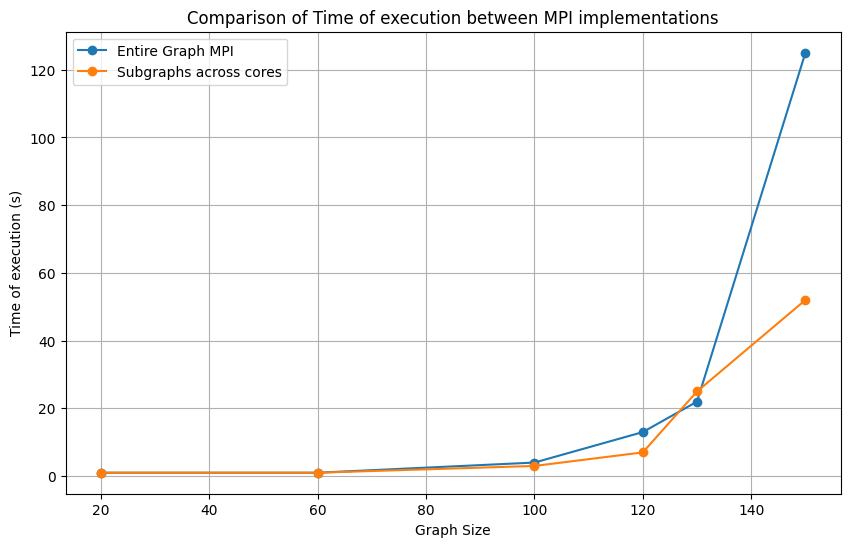

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['Graph Size'], entire_graph_time, label='Entire Graph MPI', marker='o')
plt.plot(df['Graph Size'], subgraph_implementation_time, label='Subgraphs across cores', marker='o')

plt.xlabel('Graph Size')
plt.ylabel('Time of execution (s)')
plt.title('Comparison of Time of execution between MPI implementations')
plt.legend()
plt.grid(True)
plt.show()

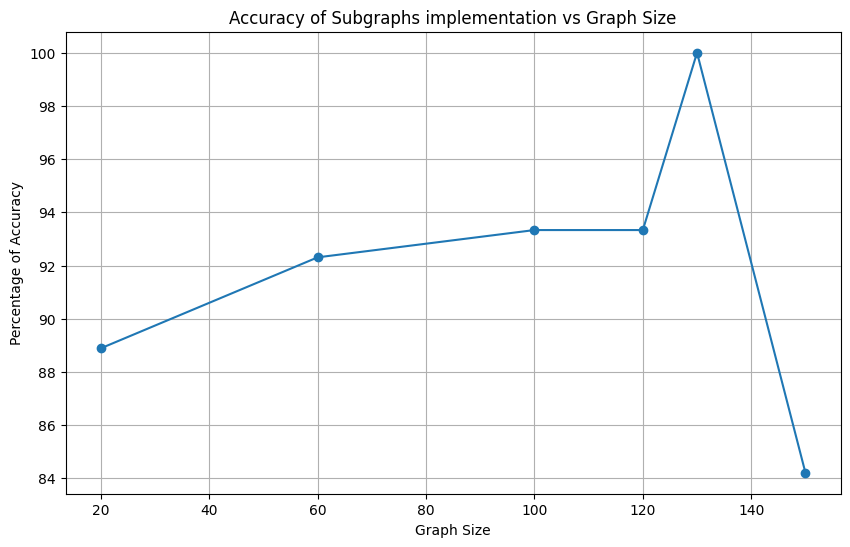

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Graph Size'], df["Accuracy Rate of MPI Subgraph"],marker='o')

plt.xlabel('Graph Size')
plt.ylabel('Percentage of Accuracy')
plt.title('Accuracy of Subgraphs implementation vs Graph Size')
plt.grid(True)
plt.show()

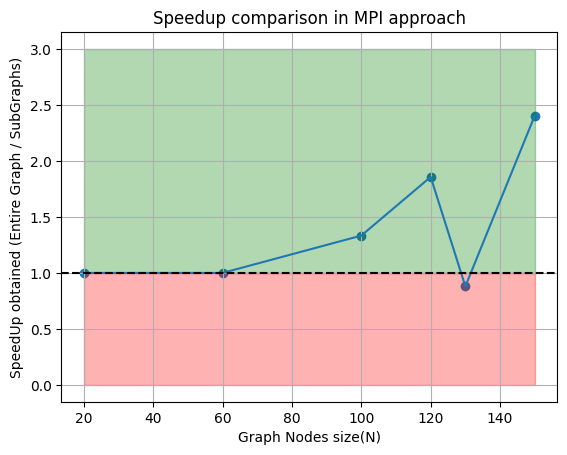

In [ ]:
import numpy as np
plt.plot(graph_sizes,np.array(entire_graph_time) / np.array(subgraph_implementation_time))
plt.scatter(graph_sizes,np.array(entire_graph_time) / np.array(subgraph_implementation_time))
plt.title("Speedup comparison in MPI approach")
plt.xlabel("Graph Nodes size(N)")
plt.ylabel("SpeedUp obtained (Entire Graph / SubGraphs)")
plt.axhline(y=1, color='black', linestyle='--', label='Baseline (Speedup = 1)')
midpoint = len(graph_sizes) // 2
speedup = np.array(subgraph_implementation_time) / np.array(entire_graph_time)
plt.fill_between(graph_sizes, 1, 3, color='green', alpha=0.3, label='Fill Region')
plt.fill_between(graph_sizes, 0, 1, color='red', alpha=0.3, label='Fill Region')
plt.grid(True)
plt.show()

As we can see by the table and plots above, the implementation of subgraphs give us a lot of performance reducing the time of execution in almost all implementations, mainly in the cases where the graph size is above 120 nodes. it leads us towards the worst cases where the input is going to be even more greater (like in real situations), so instead of wait for hours/days we can use the implementation of subgraphs distributed accros cores to find good solutions with (85% of accuracy) and in a reasonable time.

## Tenth implementation

In [ ]:
!nvcc  10_gpu_clique.cpp -o gpu_clique

# Conclusion

# References

## Clean up

In [ ]:
%cd "../.."
!rm -rf Maximal-Clique-Problem